In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression (Jan, Tim)

### 1. Import data and visualize what we have so far

In [2]:
marburg = pd.read_pickle("../0_data/marburg_clean.pkl")
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')
marburg_weather = pd.read_pickle("../0_data/weather/marburg_weather.pkl")
duisburg_weather = pd.read_pickle("../0_data/weather/duisburg_weather.pkl")

In [4]:
marburg_weather["h"]= marburg_weather.index
marburg["h"]=marburg.index.floor(freq='h')
marburgWeather = pd.merge(marburg, marburg_weather, how='left', left_on='h', right_on='h')
#marburgWeatherSorted = marburgWeather.sort_values(["h"])
#marburgWeatherSorted.head(20)

*cool graph here*

### 2. Define independent and dependent variables

In [5]:
ym = marburgWeather.resample('H', on="h").count()["day"].values
# day of year
xm = marburgWeather.resample('H', on="h").max()['temperature'].values.reshape(-1,1)
xm = np.nan_to_num(xm, nan = 10.511236338797794)

In [6]:
#xm_sum = np.sum(xm_no_nan)
#xm_nullcheck = np.isnan(xm_sum)
#xm_nullcheck

### 3. eigentlich: Train / Test split

In [7]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=0)

### 3. Initialize linear model with scikit-learn

In [8]:
linear_model_mar = LinearRegression()

### 4. Fit the model

In [9]:
linear_model_mar.fit(xm_train,ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5. Predict training data

In [10]:
y_pred_m = linear_model_mar.predict(xm_test)

### 6. Define y true

In [11]:
y_true_m = ym_test

### 7. Plot the linear model

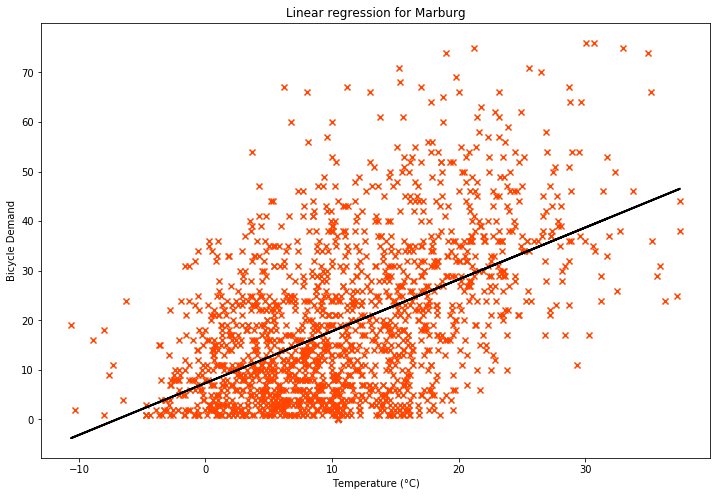

In [25]:
plt.figure(figsize = (12,8))

plt.scatter(xm_test, ym_test, marker="x", color = 'orangered')
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Demand")
plt.title("Linear regression for Marburg")

plt.plot(xm_test, y_pred_m, color = 'black', linewidth = 2, label='hier kommt noch ein label hin')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
#plt.legend()
plt.show()

### 8. Present test metrics

In [19]:
#print("Mean Absolute Error:",mean_absolute_error(y_pred_m, y_true_m),"Einheit (glaube KM dann)")
#print("Root Mean Squared Error:",mean_squared_error(y_pred_m, y_true_m)**0.5,"Einheit")
#print("Coefficient of determination:",r2_score(y_pred_m, y_true_m))

print("Mean Absolute Error:",mean_absolute_error(y_true_m, y_pred_m),"Bicycles")
print("Root Mean Squared Error:",mean_squared_error(y_true_m, y_pred_m)**0.5,"Bicycles")
print("Coefficient of determination:",r2_score(y_true_m, y_pred_m))

Mean Absolute Error: 10.81111649215055 Bicycles
Root Mean Squared Error: 13.622387446003072 Bicycles
Coefficient of determination: 0.25051982715386956


### Linear regression for duisburg

In [20]:
duisburg_weather["h"]= duisburg_weather.index
duisburg["h"]=duisburg.index.floor(freq='h')
duisburgWeather = pd.merge(duisburg, duisburg_weather, how='left', left_on='h', right_on='h')

yd = duisburgWeather.resample('H', on="h").count()["day"].values
# day of year
xd = duisburgWeather.resample('H', on="h").max()['temperature'].values.reshape(-1,1)
xd = np.nan_to_num(xm, nan = 10.511236338797794)

xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.2, random_state=0)

linear_model_dui = LinearRegression()

linear_model_dui.fit(xd_train,yd_train)

y_pred_d = linear_model_dui.predict(xd_test)

y_true_d = yd_test

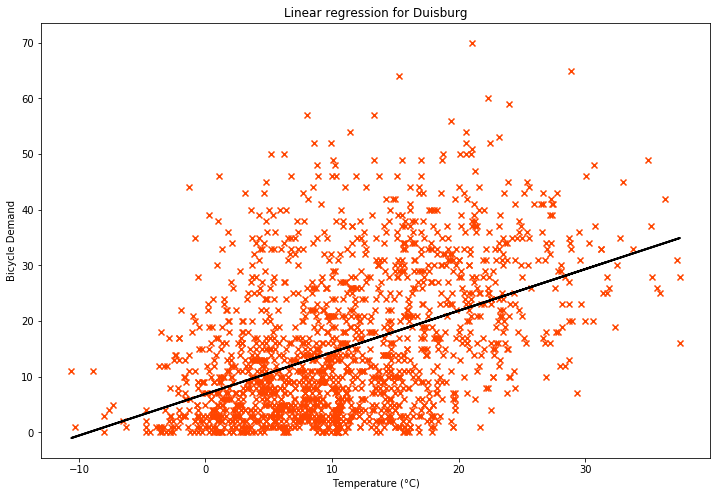

In [26]:
plt.figure(figsize = (12,8))

plt.scatter(xd_test, yd_test, marker="x", color = 'orangered')
plt.xlabel("Temperature (°C)")
plt.ylabel("Bicycle Demand")
plt.title("Linear regression for Duisburg")

plt.plot(xd_test, y_pred_d, color = 'black', linewidth = 2, label='hier kommt noch ein label hin')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
#plt.legend()
plt.show()

## Multiple linear regression

Adding another feature to the model, for example if its a weekday or not (funktioniert genau wie in WS 08).
To do that:

1. Add feature to dataframe (if it doesn't already exist)
2. Plot the same scatter plot as before, but with a different hue for the new feature
3. Train a new linear model with the additional feature, by passing a larger feature vector.
4. Predict weekdays and weekends seperately.
5. Plot the results.
6. Evaluate performance with different error metrics. Did the one-dimensional or two-dimensional model perform better?

In [27]:
marburgWeather

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,h,temperature,precipitation
0,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,2019-07-04 13:00:00,23.8,0.0
1,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,2019-07-06 16:00:00,28.1,0.0
2,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,2019-07-06 17:00:00,27.7,0.0
3,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,2019-07-06 20:00:00,21.0,0.0
4,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,2019-07-07 08:00:00,16.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
164052,2019-05-19,12:57:00,91116,marburg,"(50.8279, 8.7751)","(50.8137, 8.7707)",6,12,20,2019-05-19 12:00:00,24.0,0.0
164053,2019-05-19,21:41:00,91116,marburg,"(50.8137, 8.7707)","(50.8229, 8.7747)",6,21,7,2019-05-19 21:00:00,12.5,0.0
164054,2019-05-20,06:56:00,91116,marburg,"(50.8229, 8.7747)","(50.82, 8.7737)",0,6,3,2019-05-20 06:00:00,13.5,0.0
164055,2019-05-20,07:32:00,91116,marburg,"(50.82, 8.7737)","(50.8185, 8.7737)",0,7,20,2019-05-20 07:00:00,14.9,0.0


In [31]:
def weekday_check (dt):
    day_count = dt.weekday()
    if day_count <=4:
        return 1
    else:
        return 0

marburgWeather["IsWeekday"] = marburgWeather["day"].apply(weekday_check)
marburgWeather

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,h,temperature,precipitation,is_weekday,IsWeekday
0,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,2019-07-04 13:00:00,23.8,0.0,True,1
1,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,2019-07-06 16:00:00,28.1,0.0,False,0
2,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,2019-07-06 17:00:00,27.7,0.0,False,0
3,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,2019-07-06 20:00:00,21.0,0.0,False,0
4,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,2019-07-07 08:00:00,16.4,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164052,2019-05-19,12:57:00,91116,marburg,"(50.8279, 8.7751)","(50.8137, 8.7707)",6,12,20,2019-05-19 12:00:00,24.0,0.0,False,0
164053,2019-05-19,21:41:00,91116,marburg,"(50.8137, 8.7707)","(50.8229, 8.7747)",6,21,7,2019-05-19 21:00:00,12.5,0.0,False,0
164054,2019-05-20,06:56:00,91116,marburg,"(50.8229, 8.7747)","(50.82, 8.7737)",0,6,3,2019-05-20 06:00:00,13.5,0.0,True,1
164055,2019-05-20,07:32:00,91116,marburg,"(50.82, 8.7737)","(50.8185, 8.7737)",0,7,20,2019-05-20 07:00:00,14.9,0.0,True,1


In [36]:
xm = marburgWeather.resample('H', on="h").max()['temperature'].values.reshape(-1,1)
xm = np.nan_to_num(xm, nan = 10.511236338797794)
X = xm, marburgWeather[IsWeekday"]
X
#y = marburgWeather.resample('H', on="h").count()["day"].values
#lin_mod_day = LinearRegression()
#lin_mod_day.fit(X,y)
#print(lin_mod_day.coef_, lin_mod_day.intercept_)

SyntaxError: EOL while scanning string literal (<ipython-input-36-f4778f186b80>, line 3)

das funktioniert hier noch nicht ganz, aber bald